In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
import os

print("Current Folder:", os.getcwd())

Current Folder: C:\Users\arpit\Downloads


In [24]:

data = pd.read_csv("Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [26]:
X = data.drop("price", axis=1)
y = data["price"]

X.head(), y.head()


(   area  bedrooms  bathrooms  stories
 0  7420         4          2        3
 1  8960         4          4        4
 2  9960         3          2        2
 3  7500         4          2        2
 4  7420         4          1        2,
 0    13300000
 1    12250000
 2    12250000
 3    12215000
 4    11410000
 Name: price, dtype: int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((436, 4), (109, 4))

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred = model.predict(X_test_scaled)


In [31]:



from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance")
print("MAE :", mae)
print("RMSE:", rmse)

if len(y_test) > 1:
    from sklearn.metrics import r2_score
    print("R2 Score:", r2_score(y_test, y_pred))
else:
    print("R2 Score: Not defined (very small test data)")


Model Performance
MAE : 1158970.480316688
RMSE: 1567718.610600158
R2 Score: 0.5137585349037066


In [32]:



# Predict new house price (WITH feature names)
new_house = pd.DataFrame(
    [[2500, 3, 2, 2]],
    columns=X.columns
)

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 4816258.564214053


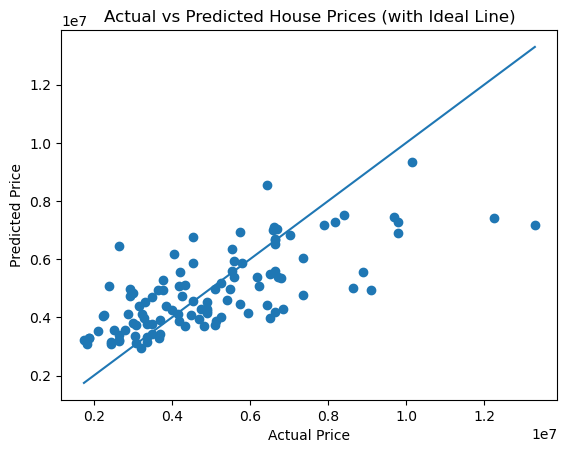

Model Accuracy (R² Score): 0.5137585349037066
Accuracy in Percentage: 51.37585349037066


In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred)

# Ideal line (y = x) in RED
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (with Ideal Line)")
plt.show()

from sklearn.metrics import r2_score

# R2 Score (Accuracy for Regression)
accuracy = r2_score(y_test, y_pred)

print("Model Accuracy (R² Score):", accuracy)
print("Accuracy in Percentage:", accuracy * 100)

